# Weekly Score Analyzation  

## Latest News  
|Date|Discription|Note|
|:---:|:---:|:---:|
|20200602|2020 年 5 月 25 日から 6 月 1 日のデータを反映させた。|過去 2 回と比較してハイレベル|  

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.precision = 2

In [13]:
# データの読み込み
data_sources = {"20_0511_0518": "./weekly/2020_0511_0518.csv",
                "20_0518_0525": "./weekly/2020_0518_0525.csv",
                "20_0525_0601": "./weekly/2020_0525_0601.csv"}

df = pd.DataFrame(columns=("RANK","BATTLES", "WIN", "LOSE", "DRAW", "SCORE"))

for k, v in data_sources.items():
    tmp = pd.read_csv(v, encoding="utf8", dtype="float")
    tmp = tmp[tmp["RANK"]<=100]
    tmp["SOURCE"] = k
    tmp["SOURCE"].astype(str)
    c = len(tmp)
    print(f"Source: {k}, Count: {c}")
    df = pd.concat([df, tmp], ignore_index=True)

Source: 20_0511_0518, Count: 180
Source: 20_0518_0525, Count: 192
Source: 20_0525_0601, Count: 163


In [14]:
def get_prize_zone(rank):
    if rank == 1:
        return "0_1st"    
    elif rank <= 5:
        return "1_<= 5th"
    elif rank <= 10:
        return "2_<= 10th"
    elif rank <= 50:
        return "3_<= 50th"
    elif rank<= 100:
        return "4_<= 100th"
    else:
        return "5_out of zone"
    
df["P_ZONE"] = df["RANK"].apply(get_prize_zone)

In [15]:
df["WIN_RATIO"] = df["WIN"]/df["BATTLES"]  # 勝率
df["DIFF_W_L"] = df["WIN"]-df["LOSE"]  # 勝敗の差

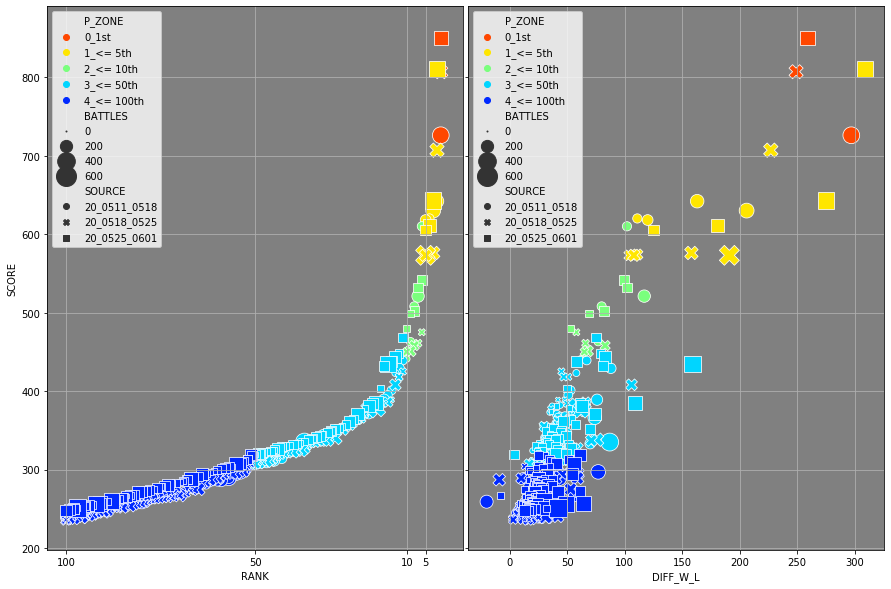

In [49]:
common_settings = {"facecolor": "gray",}
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,10), 
                       subplot_kw=common_settings)
fig.subplots_adjust(wspace=0.01)   

sns.scatterplot("RANK", "SCORE", hue="P_ZONE", palette="jet_r", 
                style="SOURCE", size="BATTLES", sizes=(1, 400), ax=ax.flatten()[0], data=df)
ax.flatten()[0].grid()
ax.flatten()[0].set_xlim(105, -5)
ax.flatten()[0].set_xticks([100, 50, 10, 5])

sns.scatterplot("DIFF_W_L", "SCORE", hue="P_ZONE", palette="jet_r", 
                style="SOURCE", size="BATTLES", sizes=(1, 400), ax=ax.flatten()[1], data=df)
ax.flatten()[1].grid()

plt.show()

In [18]:
pd.pivot_table(df, index="P_ZONE", columns="SOURCE", values="SCORE", aggfunc=["mean", "max", "min"], margins=True)

mean                                            max  \
SOURCE     20_0511_0518 20_0518_0525 20_0525_0601     All 20_0511_0518   
P_ZONE                                                                   
0_1st            726.00       807.00       850.00  794.33        726.0   
1_<= 5th         627.50       596.00       667.50  625.43        642.0   
2_<= 10th        508.60       459.00       510.80  492.80        610.0   
3_<= 50th        350.23       341.82       357.40  349.17        439.0   
4_<= 100th       261.58       256.16       271.69  262.75        302.0   
All              300.82       301.70       317.52  306.22        726.0   

                                                     min               \
SOURCE     20_0518_0525 20_0525_0601    All 20_0511_0518 20_0518_0525   
P_ZONE                                                                  
0_1st             807.0        850.0  850.0        726.0        807.0   
1_<= 5th          707.0        811.0  811.0        618.0        573.0   
2_<= 10th         475.0        541.0  610.0        441.0        450.0   
3_<= 50th         425.0        468.0  468.0        303.0        307.0   
4_<= 100th        306.0        318.0  318.0        239.0        236.0   
All               807.0        850.0  850.0        239.0        236.0   

                                
SOURCE     20_0525_0601    All  
P_ZONE                          
0_1st             850.0  726.0  
1_<= 5th          605.0  573.0  
2_<= 10th         480.0  441.0  
3_<= 50th         319.0  303.0  
4_<= 100th        248.0  236.0  
All               248.0  236.0

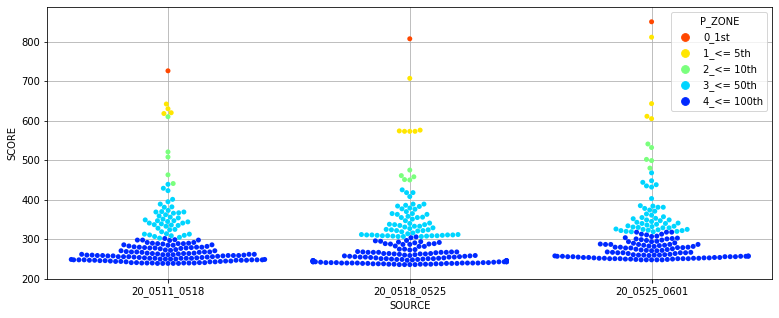

In [54]:
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1, 1, 1)
sns.swarmplot("SOURCE", "SCORE", hue="P_ZONE", palette="jet_r", data=df, ax=ax)
ax.grid()

plt.show()

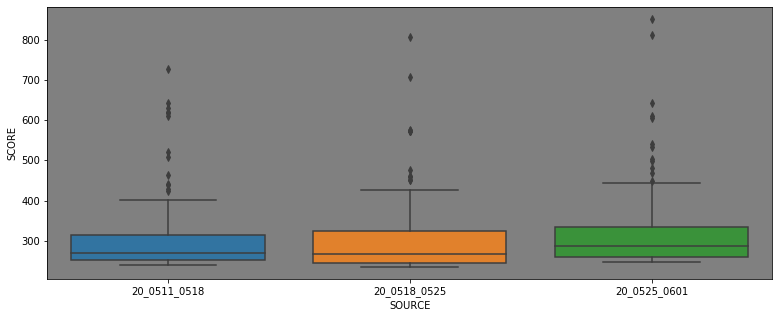

In [53]:
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot("SOURCE", "SCORE", data=df, ax=ax)
ax.set_facecolor("gray")
plt.show()